# ISLP Lab work

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots 

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [4]:
from plotnine import *

In [5]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'aes',
 'after_scale',
 'after_stat',
 'annotate',
 'annotation_logticks',
 'annotation_stripes',
 'anova_lm',
 'arrow',
 'as_labeller',
 'coord_cartesian',
 'coord_equal',
 'coord_fixed',
 'coord_flip',
 'coord_trans',
 'element_blank',
 'element_line',
 'element_rect',
 'element_text',
 'exit',
 'expand_limits',
 'facet_grid',
 'facet_null',
 'facet_wrap',
 'geom_abline',
 'geom_area',
 'geom_bar',
 'geom_bin2d',
 'geom_bin_2d',
 'geom_blank',
 'geom_boxplot',
 'geom_col',
 'geom_count',
 'geom_crossbar',
 'geom_density',
 'geom_density_2d',
 'geom_dotplot',
 'geom_errorbar',
 'geom_errorbarh',
 'geom_freqpoly',
 'geom_histogram',
 'geom_hline',
 'geom_jitter',
 'geom_label',
 'geom_line',
 'geom_linerange',
 'geom_map',
 '

In [6]:
A = np.array([3,5,10])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [7]:
A.sum()

18

In [8]:
A.tostring()

C:\Users\doria\AppData\Local\Temp\ipykernel_17800\4038112043.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


b'\x03\x00\x00\x00\x05\x00\x00\x00\n\x00\x00\x00'

# Simple Linear Regression

In [9]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [10]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


We want to predict `medv` from `lstat`. We can create the model matrix by hand by adding a colulms of `1` for the intercept (the $\beta_0$)

In [11]:
X = pd.DataFrame({
    'intecept' : np.ones(Boston.shape[0]),
    'lstat': Boston['lstat']
})
y = Boston['medv']

In [12]:
model = sm.OLS(y,X)
results = model.fit()

In [13]:
summarize(results)

,coef,std err,t,P>|t|
intecept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


#### Transforms :
The sklearn package has a particular notion for this type of task : a transform. A transform is an object that is created with some parameters as arguments. The object has two main methods: `fit()` and `transform()`
The `Model_Spec()` renamed `MS()` from ISLP creates a transform object then pair it with the two funcions above that are used to construct the corresponding model matrix.

In [14]:
design = MS(['lstat']) 
design = design.fit(Boston) # checks if 'lstat' specified in design exists in Boston
X = design.transform(Boston) # constructs the model matrix
X.head()

ModelSpec(terms=['lstat'])


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [15]:
# the previous cell is equivalent to this one :
design = MS(['lstat'])
X = design.fit_transform(Boston)
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


Lets return to our fitted regression model. The object `results` has several methods that can be used for inference as `summarize()` for shocwing essentials of the fit.
Lets dive to other ones:

In [16]:
results.summary() # Full and exaustive summary of the fit 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           5.08e-88
Time:                        10:41:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intecept      34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
results.params # to retrive the fitted coefficients

intecept    34.553841
lstat       -0.950049
dtype: float64

The `get_prediction()` method can be used to obtain predictions and produce confidence intervals and predictions intervals of medv for gien values of lstat.

In [18]:
new_df = pd.DataFrame({
    'lstat' : [5,10,15]
}) # creating a new data frame containing lstat values we wish to make predictions
newX = design.transform(new_df) # constructs the model matrix 
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX` and view them by extracting the `predicted_mean` attribute.

In [19]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [20]:
new_predictions.conf_int(alpha=0.05) # 95% confidence intervals for the predicted values 

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [21]:
new_predictions.conf_int(obs=True, alpha=0.05) # if we want the 95% prediction intervals

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

Now let's plot `medv` and `lstat` using `DataFrame.plot.scatter()` and adding regression line to the resulting plot. But before, lets define the functions (even if I guess we can do it as well with ggplot)

C:\Users\doria\AppData\Local\Temp\ipykernel_17800\1787337570.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


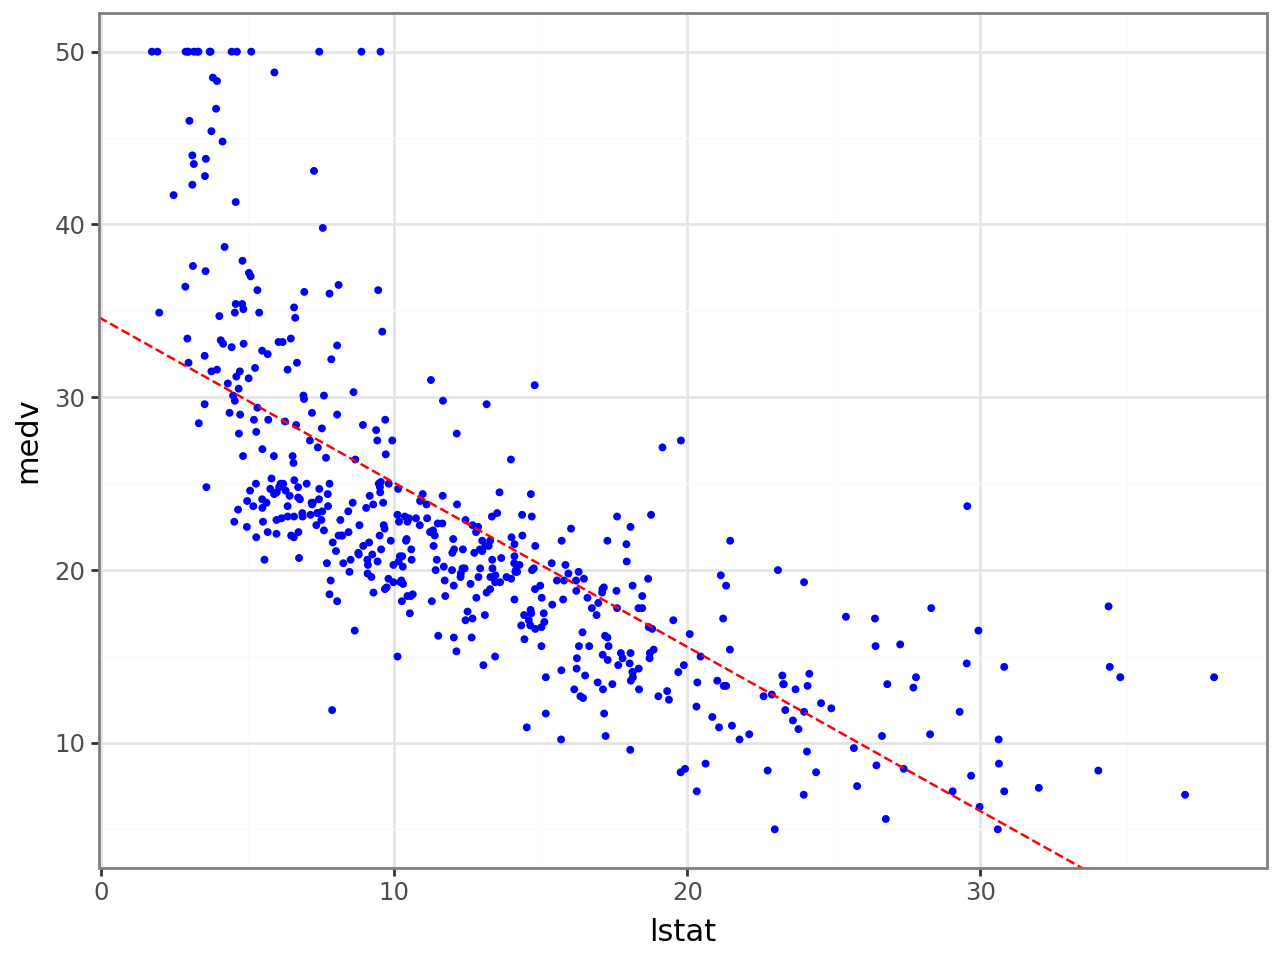

In [22]:
(
    ggplot(Boston, aes(x='lstat', y=('medv')))
           + geom_point(color='blue', size=0.6) 
           + geom_abline(intercept=results.params[0], slope=results.params[1], color='red', linetype='dashed')
           + theme_bw()
)